In [1]:
#!pip install datefinder

In [2]:
#Importing the required librarie and functions
#a warnings filter is also activated

import pandas as pd
import pymongo
import numpy as np
import datefinder as dfi
import datetime
from pandas import ExcelWriter
import warnings 
from src.cleanfuncs import *
warnings.simplefilter('ignore')

# A. Trade flows (Canary)

In [3]:
#Importing the downloaded dataset and taking a look at it

IC_trade = pd.read_csv ('data/canary_imports_dirty.csv')
IC_trade.head(5)

,Unnamed: 0,Time,Polonia,Chequia,Suiza,Francia,Italia,Bélgica,Dinamarca,Suecia,Irlanda,Países Bajos,Reino Unido,Alemania
0,0,2021 Noviembre (p),"4.473,862","4.698,110","2.220,403","31.485,825","36.338,226","6.008,680","2.178,621","1.574,086","6.561,863","36.734,327","11.720,918","29.201,971"
1,1,2021 Octubre (p),"3.360,605","9.997,751","1.711,822","7.672,856","12.718,099","4.617,084","2.493,726","1.773,129","3.440,667","29.173,793","6.908,026","25.644,328"
2,2,2021 Septiembre (p),"2.619,986","7.827,948","1.331,296","11.305,727","10.842,908","6.359,599","1.133,544","1.540,708","5.547,320","39.631,925","6.700,103","26.015,663"
3,3,2021 Agosto (p),"2.627,623","3.586,898","1.031,052","7.893,321","13.490,680","11.802,737","1.636,533","1.318,356","5.301,273","16.572,673","4.030,151","39.025,092"
4,4,2021 Julio (p),"2.102,901","10.212,904","1.264,930","7.513,558","16.195,542","10.413,309","1.557,271","1.475,441","4.772,880","18.454,604","3.430,143","35.785,879"


In [4]:
#Applying different functions to clean the "Time" column
#and displaying the result

IC_trade.Time = IC_trade.Time.apply(del_years)
IC_trade.Time = IC_trade.Time.apply(del_p)
IC_trade.Time = IC_trade.Time.apply(del_years)
IC_trade.Time = IC_trade.Time.apply(del_spaces)
IC_trade.Time = IC_trade.Time.apply(translate_month)
IC_trade.drop(IC_trade.index[IC_trade['Time'] == 'tbd'], inplace=True)
IC_trade.Time = IC_trade.Time.apply(datematcher)
IC_trade.Time = IC_trade.Time.apply(dateconverter)
IC_trade = IC_trade[IC_trade.Time < datetime.date(2020, 1, 7)]
IC_trade = IC_trade.drop('Unnamed: 0', axis=1)

IC_trade.sample(5)

,Time,Polonia,Chequia,Suiza,Francia,Italia,Bélgica,Dinamarca,Suecia,Irlanda,Países Bajos,Reino Unido,Alemania
244,2003-01-08,"1.066,327","876,966","1.007,422","12.592,066","23.153,524","5.824,209","2.570,455","2.846,406","4.010,113","11.788,893","27.894,149","30.291,820"
165,2009-02-08,"1.034,098","968,673","2.175,067","26.262,190","10.937,190","8.902,471","5.239,684","2.567,595","3.451,044","19.729,405","9.965,756","31.034,156"
40,2018-10-08,"3.894,980","5.433,241","2.171,150","10.200,227","15.590,538","5.526,683","43.593,927","28.303,848","5.536,122","30.447,541","13.586,297","47.672,850"
221,2004-11-08,"1.794,139","858,917","1.135,521","20.377,123","25.757,711","6.659,675","3.953,593","3.027,918","6.123,091","12.272,782","24.806,788","29.353,825"
84,2015-05-08,"4.058,988","3.467,124","2.503,494","13.948,101","11.334,607","8.866,909","1.929,508","2.128,236","2.793,782","31.532,541","8.075,885","27.386,979"


In [5]:
# Checking the presence of null values, no nulls are detected
pd.isnull(IC_trade).sum()

Time            0
Polonia         0
Chequia         0
Suiza           0
Francia         0
Italia          0
Bélgica         0
Dinamarca       0
Suecia          0
Irlanda         0
Países Bajos    0
Reino Unido     0
Alemania        0
dtype: int64

# B. Trade flows (Balearic)

In [6]:
#Importing the downloaded dataset and taking a look at it
BI_trade = pd.read_csv ('data/balearic_imports_dirty.csv')
BI_trade.head(5)

,Unnamed: 0,Time,Polonia,República Checa,Francia,Italia,Bélgica,Dinamarca,Suecia,Irlanda,Países Bajos,Reino Unido,Alemania
0,0,2021_Acumulado,7.865.370,1.731.141,123.007.720,230.446.676,53.882.732,4.191.680,8.585.209,4.747.182,178.607.869,42.775.095,196.025.757
1,1,2021M11,1.026.951,66.902,12.992.763,30.885.089,4.247.049,505.164,723.796,1.018.726,35.186.304,3.161.318,23.733.996
2,2,2021M10,719.417,84.056,7.735.753,6.687.123,5.202.484,454.991,1.167.503,331.710,22.533.426,3.540.810,31.231.364
3,3,2021M09,1.183.774,265.947,7.650.884,8.474.734,7.426.750,641.261,1.410.221,1.066.762,25.881.548,3.876.277,24.229.240
4,4,2021M08,548.923,294.308,7.617.475,25.701.516,7.100.870,348.110,927.643,682.895,14.463.688,3.736.112,13.060.456


In [7]:
#Applying different functions to clean the "Time" column
#and displaying the result

BI_trade.Time = BI_trade.Time.apply(del_total)
BI_trade.Time = BI_trade.Time.apply(del_years)
BI_trade.drop(BI_trade.index[BI_trade['Time'] == 'tbd'], inplace=True)
BI_trade.Time = BI_trade.Time.apply(del_acumulado)
BI_trade.Time = BI_trade.Time.apply(translate_number)
BI_trade.Time = BI_trade.Time.apply(datematcher)
BI_trade.Time = BI_trade.Time.apply(dateconverter)
BI_trade = BI_trade.drop('Unnamed: 0', axis=1)

BI_trade.sample(5)

,Time,Polonia,República Checa,Francia,Italia,Bélgica,Dinamarca,Suecia,Irlanda,Países Bajos,Reino Unido,Alemania
176,2008-05-08,1.245.084,165.294,6.091.266,10.968.414,1.470.375,455.156,1.325.714,800.964,2.521.280,2.998.592,14.902.111
54,2017-10-08,670.516,374.096,10.659.186,22.131.847,12.156.662,293.508,1.072.027,234.840,14.081.636,6.794.875,21.400.409
17,2020-08-08,449.724,39.327,6.067.183,5.065.375,3.610.405,189.856,272.696,302.886,7.871.415,5.818.487,16.528.218
56,2017-08-08,508.463,225.793,12.738.277,34.805.445,10.046.089,401.445,901.415,461.344,11.070.028,3.946.211,19.087.339
225,2004-08-08,409.397,144.421,5.348.635,3.714.812,1.173.500,381.550,1.432.729,387.154,2.037.235,7.601.732,6.640.548


In [8]:
# Checking the presence of null values, no nulls are detected
pd.isnull(BI_trade).sum()

Time               0
Polonia            0
República Checa    0
Francia            0
Italia             0
Bélgica            0
Dinamarca          0
Suecia             0
Irlanda            0
Países Bajos       0
Reino Unido        0
Alemania           0
dtype: int64

# C. Tourists in the Canaries

In [9]:
#Countries for which there is detailed data for number of visitors and imports initially
#The sample may be subject to changes 

countries = ['UK', 'HOLANDA', 'IRLANDA', 'SUECIA', 'BELGICA', 'ITALIA', 'FRANCIA', 'REPCHECA', 'POLONIA', 'ALEMANIA', 'SUIZA', 'DINAMARCA']
countries_noger = ['UK', 'HOLANDA', 'IRLANDA', 'SUECIA', 'BELGICA', 'ITALIA', 'FRANCIA', 'REPCHECA', 'POLONIA', 'SUIZA', 'DINAMARCA']

In [10]:
#The following code is employed to create a new sub-dataframe
#for the trade flows data of each country, modify the name of the headers
#and add a new column to keep track of the referredthe country 
#once the dataframes are merged into a new form later on

#A function was defined to perform the same task as the code lines below for each country
#in a more efficient way
#this function can be found in the cleanfuncs.py file in the src folder with the name
#"sub_df" however it has not been implemented due to time constraints in and the need for
#further perfectioning and cohesion with the rest of the code.
#Future versions of the code contained in this jupyter notebook should include this function
#instead of the repeated code currently employed

Polonia_IC = pd.DataFrame(IC_trade[['Time','Polonia']])
Polonia_IC = Polonia_IC.rename({'Polonia': 'Imports'}, axis=1)
Polonia_IC['Country'] = ['PLN' for v in range (0,240)]

República_Checa_IC = pd.DataFrame(IC_trade[['Time','Chequia']])
República_Checa_IC = República_Checa_IC.rename({'Chequia': 'Imports'}, axis=1)
República_Checa_IC['Country'] = ['CZE' for v in range (0,240)]

Francia_IC = pd.DataFrame(IC_trade[['Time','Francia']])
Francia_IC = Francia_IC.rename({'Francia': 'Imports'}, axis=1)
Francia_IC['Country'] = ['FRA' for v in range (0,240)]

Italia_IC = pd.DataFrame(IC_trade[['Time','Italia']])  
Italia_IC = Italia_IC.rename({'Italia': 'Imports'}, axis=1)
Italia_IC['Country'] = ['ITA' for v in range (0,240)]

Bélgica_IC = pd.DataFrame(IC_trade[['Time','Bélgica']])  
Bélgica_IC = Bélgica_IC.rename({'Bélgica': 'Imports'}, axis=1)
Bélgica_IC['Country'] = ['BEL' for v in range (0,240)]

Suecia_IC = pd.DataFrame(IC_trade[['Time','Suecia']])
Suecia_IC = Suecia_IC.rename({'Suecia': 'Imports'}, axis=1)
Suecia_IC['Country'] = ['SWE' for v in range (0,240)]

Irlanda_IC = pd.DataFrame(IC_trade[['Time','Irlanda']])  
Irlanda_IC = Irlanda_IC.rename({'Irlanda': 'Imports'}, axis=1)
Irlanda_IC['Country'] = ['IRL' for v in range (0,240)]

Países_Bajos_IC = pd.DataFrame(IC_trade[['Time','Países Bajos']]) 
Países_Bajos_IC = Países_Bajos_IC.rename({'Países Bajos': 'Imports'}, axis=1)
Países_Bajos_IC['Country'] = ['NLD' for v in range (0,240)]

Reino_Unido_IC = pd.DataFrame(IC_trade[['Time','Reino Unido']]) 
Reino_Unido_IC = Reino_Unido_IC.rename({'Reino Unido': 'Imports'}, axis=1)
Reino_Unido_IC['Country'] = ['GBR' for v in range (0,240)]

Alemania_IC = pd.DataFrame(IC_trade[['Time','Alemania']])
Alemania_IC = Alemania_IC.rename({'Alemania': 'Imports'}, axis=1)
Alemania_IC['Country'] = ['GER' for v in range (0,240)]

Dinamarca_IC = pd.DataFrame(IC_trade[['Time','Dinamarca']])
Dinamarca_IC = Dinamarca_IC.rename({'Dinamarca': 'Imports'}, axis=1)
Dinamarca_IC['Country'] = ['DEN' for v in range (0,240)]

Suiza_IC = pd.DataFrame(IC_trade[['Time','Suiza']])
Suiza_IC = Suiza_IC.rename({'Suiza': 'Imports'}, axis=1)
Suiza_IC['Country'] = ['SWI' for v in range (0,240)]

#Each of the generated datafrmes above is "sent" to excel to then be retrieved back

with ExcelWriter('data/support_tourist.xlsx') as writer: 
    
    Polonia_IC.to_excel(writer, sheet_name='POLONIA')
    República_Checa_IC.to_excel(writer, sheet_name='REPCHECA')
    Francia_IC.to_excel(writer, sheet_name='FRANCIA')
    Italia_IC.to_excel(writer, sheet_name='ITALIA') 
    Bélgica_IC.to_excel(writer, sheet_name='BELGICA') 
    Suecia_IC.to_excel(writer, sheet_name='SUECIA')
    Irlanda_IC.to_excel(writer, sheet_name='IRLANDA')
    Países_Bajos_IC.to_excel(writer, sheet_name='HOLANDA')
    Reino_Unido_IC.to_excel(writer, sheet_name='UK')
    Alemania_IC.to_excel(writer, sheet_name='ALEMANIA') 
    
    Suiza_IC.to_excel(writer, sheet_name='SUIZA')
    Dinamarca_IC.to_excel(writer, sheet_name='DINAMARCA')                             

In [11]:
#Now it is time to combine our data on imports with our data on trade, for that
#the following loop has been designed:

#The objective is to 'slice' dataframe A and append each of these slices to the dataframe B
# all of this in the desired format

for c in countries:
    df_A = pd.read_excel('data/TuristasCI_Short.xls', sheet_name= f'{c}')
    df_B = pd.read_excel('data/support_tourist.xlsx', sheet_name= f'{c}')
    df_A.drop(labels='TOTAL', inplace=True, axis=1)
    df_A.rename(columns={"Unnamed: 0":"Year"}, inplace=True)
    #Eliminate all rows whose observations took place in a year out of our range of interest
    df_A = df_A[df_A.Year > 1999]
    df_A = df_A[df_A.Year < 2020]
    #Creating a transposed versión of DF_A that makes easier to slice it
    df_AT = df_A.T   

    #changing column names of the transposed so a for loop with numeric range can be declared
    df_AT.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
    df_AT = df_AT.reset_index()
    df_AT.drop(labels='index', inplace=True, axis=1)
    df_AT = df_AT.iloc[1: , :]
    
    df_C = df_AT['1']
    
    #This loop is the one in charge of transforming the df containing tourist data from a table
    #to a pandas serie (cloumn-like) which will be later appended to df_B which contains data on imports
    for i in range(2,21):
        df_D = df_AT[f'{i}']
        df_C = pd.concat([df_C, df_D])
    
    #DF_C transformed into a dataframa (ultil now it was a pd series)
    df_C = df_C.to_frame()
    df_C.columns = ['Column_A']
    print(f'Saving {c}...')
    df_C = df_C.reset_index()
    #DF_C which contains a single column with the tourist info of the country of this iteration is 
    #appended to DF_B which has te info on trade. DF_B is the struture that combines data on trade an tourism
    df_B['Tourist'] = df_C['Column_A']
    #The following codelines shape and transform DF_B so it has the intended shape, 
    #reflects the information accurately and is functional
    df_B = df_B.reset_index()
    df_B.rename(columns={"Unnamed: 0":"Delete"}, inplace=True)
    df_B.drop(labels='Delete', inplace=True, axis=1)
    lista_B = df_B['Tourist'].to_list()
    lista_B.reverse()
    df_B['Tourists'] = lista_B
    df_B.drop(labels='Tourist', inplace=True, axis=1)
    
    #finally, the df generated in this iteration is stored as an excel file

    with ExcelWriter(f'data/support_tourist_folder/{c}.xlsx') as writer:
        df_B.to_excel(writer, sheet_name= f'{c}')

Saving UK...
Saving HOLANDA...
Saving IRLANDA...
Saving SUECIA...
Saving BELGICA...
Saving ITALIA...
Saving FRANCIA...
Saving REPCHECA...
Saving POLONIA...
Saving ALEMANIA...
Saving SUIZA...
Saving DINAMARCA...


In [12]:
#With a different dataframe containing the combined info on tourism and trade stored 
#in different excel files, it is time to import them back to python and then concatenate them
#in order to have just one dataframe of refference, that is the aim of the following codelines

df_X = pd.read_excel('data/support_tourist_folder/ALEMANIA.xlsx')
for c in countries_noger:
    df_Y = pd.read_excel(f'data/support_tourist_folder/{c}.xlsx')
    df_X = pd.concat([df_X, df_Y])

#finally, the following lines apply some minor changes to our final product to 
#give it an appropriate format and the desired level of functionability
        
df_X.rename(columns={"Unnamed: 0":"Delete"}, inplace=True)
df_X.drop(labels='Delete', inplace=True, axis=1)
df_X.rename(columns={"index":"Delete"}, inplace=True)
df_X.drop(labels='Delete', inplace=True, axis=1)
df_X['Year'] = df_X['Time'].dt.year
df_X['Imports'] = df_X['Imports'].apply(punct_num)
df_X["Imports"] = pd.to_numeric(df_X["Imports"], downcast="float")

#The data for the canaries expresses import data in thousands of euros
#for a more intuitive representation the column 'imports'
#is multiplied by 1000 so is expressed in euros instead of thousands
#of euros

df_X['Imports'] = df_X['Imports'].apply(lambda x: x*1000)

display(df_X)

#This dataframe called df_X is the final result of this section, as it can be seen
#belos as the output of the display() command above, it has information on imports and
#number of visitors to the canary islands for each coutry of origin and period 
#(each period represents a month in the interval 2000-2019 for now)

,Time,Imports,Country,Tourists,Year
0,2019-12-08,3.691748e+07,GER,270865,2019
1,2019-11-08,3.503588e+07,GER,270307,2019
2,2019-10-08,5.070667e+07,GER,213744,2019
3,2019-09-08,2.358755e+07,GER,182978,2019
4,2019-08-08,3.058354e+07,GER,187302,2019
...,...,...,...,...,...
235,2000-05-08,3.160726e+06,DEN,8718,2000
236,2000-04-08,2.636032e+06,DEN,21934,2000
237,2000-03-08,3.576811e+06,DEN,32809,2000
238,2000-02-08,2.452499e+06,DEN,31644,2000


# D. Tourists in the Balearics

In [13]:
#Defining some relevant list that will be employed in the code below
countries_nosui = ['Reino Unido', 'Paises Bajos', 'Belgica', 'Italia', 'Francia', 'Alemania']
countries_noger_nosui = ['Reino Unido', 'Paises Bajos', 'Belgica', 'Italia', 'Francia']
country_sample = ['Belgica','Francia' 'Italia', 'Paises Bajos', 'Reino Unido', 'Alemania', 'Suiza' ,'Rusia']

In [14]:
#The following code is employed to create a new sub-dataframe
#for the trade flows data of each country, modify the name of the headers
#and add a new column to keep track of the referredthe country 
#once the dataframes are merged into a new form later on

#A function was defined to perform the same task as the code lines below for each country
#in a more efficient way
#this function can be found in the cleanfuncs.py file in the src folder with the name
#"sub_df" however it has not been implemented due to time constraints in and the need for
#further perfectioning and cohesion with the rest of the code.
#Future versions of the code contained in this jupyter notebook should include this function
#instead of the repeated code currently employed

Polonia_BI = pd.DataFrame(BI_trade[['Time','Polonia']]).rename({'Polonia': 'Imports'}, axis=1)
Polonia_BI = Polonia_BI.rename({'Polonia': 'Imports'}, axis=1)
Polonia_BI['Country'] = ['PLN' for v in range (0,263)]

República_Checa_BI = pd.DataFrame(BI_trade[['Time','República Checa']])
República_Checa_BI = República_Checa_BI.rename({'Chequia': 'Imports'}, axis=1)
República_Checa_BI['Country'] = ['CZE' for v in range (0,263)]

Francia_BI = pd.DataFrame(BI_trade[['Time','Francia']])
Francia_BI = Francia_BI.rename({'Francia': 'Imports'}, axis=1)
Francia_BI['Country'] = ['FRA' for v in range (0,263)]

Italia_BI = pd.DataFrame(BI_trade[['Time','Italia']])  
Italia_BI = Italia_BI.rename({'Italia': 'Imports'}, axis=1)
Italia_BI['Country'] = ['ITA' for v in range (0,263)]

Bélgica_BI = pd.DataFrame(BI_trade[['Time','Bélgica']])  
Bélgica_BI = Bélgica_BI.rename({'Bélgica': 'Imports'}, axis=1)
Bélgica_BI['Country'] = ['BEL' for v in range (0,263)]

Suecia_BI = pd.DataFrame(BI_trade[['Time','Suecia']])
Suecia_BI = Suecia_BI.rename({'Suecia': 'Imports'}, axis=1)
Suecia_BI['Country'] = ['SWE' for v in range (0,263)]

Irlanda_BI = pd.DataFrame(BI_trade[['Time','Irlanda']])  
Irlanda_BI = Irlanda_BI.rename({'Irlanda': 'Imports'}, axis=1)
Irlanda_BI['Country'] = ['IRL' for v in range (0,263)]

Países_Bajos_BI = pd.DataFrame(BI_trade[['Time','Países Bajos']]) 
Países_Bajos_BI = Países_Bajos_BI.rename({'Países Bajos': 'Imports'}, axis=1)
Países_Bajos_BI['Country'] = ['NLD' for v in range (0,263)]

Reino_Unido_BI = pd.DataFrame(BI_trade[['Time','Reino Unido']]) 
Reino_Unido_BI = Reino_Unido_BI.rename({'Reino Unido': 'Imports'}, axis=1)
Reino_Unido_BI['Country'] = ['GBR' for v in range (0,263)]

Alemania_BI = pd.DataFrame(BI_trade[['Time','Alemania']])
Alemania_BI = Alemania_BI.rename({'Alemania': 'Imports'}, axis=1)
Alemania_BI['Country'] = ['GER' for v in range (0,263)]

Dinamarca_BI = pd.DataFrame(BI_trade[['Time','Dinamarca']])
Dinamarca_BI = Dinamarca_BI.rename({'Dinamarca': 'Imports'}, axis=1)
Dinamarca_BI['Country'] = ['DEN' for v in range (0,263)]

#Each of the generated datafrmes above is "sent" to excel to then be retrieved back

with ExcelWriter('data/support_tourist_2.xlsx') as writer: 
   
    Polonia_BI.to_excel(writer, sheet_name='POLONIA')
    República_Checa_BI.to_excel(writer, sheet_name='REPCHECA')
    Francia_BI.to_excel(writer, sheet_name='Francia')
    Italia_BI.to_excel(writer, sheet_name='Italia') 
    Bélgica_BI.to_excel(writer, sheet_name='Belgica') 
    Suecia_BI.to_excel(writer, sheet_name='SUECIA')
    Irlanda_BI.to_excel(writer, sheet_name='IRLANDA')
    Países_Bajos_BI.to_excel(writer, sheet_name='Paises Bajos')
    Reino_Unido_BI.to_excel(writer, sheet_name='Reino Unido')
    Alemania_BI.to_excel(writer, sheet_name='Alemania') 
   
    Dinamarca_BI.to_excel(writer, sheet_name='DINAMARCA')

In [15]:
#Importing data on tourists and shaping it according to the desired output

df_K = pd.read_csv('data/TuristasBI_Short_C.csv', sep=';')

df_K.rename(columns={"Unnamed: 0":"Time"}, inplace=True)
df_K["Time"] = df_K["Time"].apply(translate_number)
df_K["Time"] = df_K["Time"].apply(datematcher)

#period of study (2005-2019) - shorter than in the canaries due to 
#a more modest data coverage, the same happens for the countires
#included in the sample, which are fewer for the balearic islands
df_K = df_K[df_K.Time > datetime.datetime(2005,1,1)]
df_K = df_K[df_K.Time < datetime.datetime(2020,1,1)]

#Russia is deleted from sample due to high number of nans
df_K = df_K.replace('...', np.nan)
df_K.drop(labels='Rusia', inplace=True, axis=1)
df_K = df_K.reset_index()
df_K.rename(columns={"index":"Delete"}, inplace=True)
df_K.drop(labels='Delete', inplace=True, axis=1)

display(df_K)

df_K.isna().sum()

,Time,Belgica,Francia,Italia,Paises Bajos,Reino Unido,Alemania,Suiza
0,2019-12-08,1846,8395,3419,2933,15391,69008,3878
1,2019-11-08,1975,8608,5582,5557,15415,108237,5966
2,2019-10-08,14214,64842,29927,48883,337509,466520,45825
3,2019-09-08,35823,94693,102521,76201,606611,645933,62384
4,2019-08-08,41162,161094,192856,108556,646813,593696,61803
...,...,...,...,...,...,...,...,...
175,2005-05-08,15555,38240,35180,28198,454937,454274,23962
176,2005-04-08,8110,40556,7547,3532,145653,231734,12940
177,2005-03-08,3605,9634,3869,2133,87277,233349,6693
178,2005-02-08,1722,5258,2107,1000,44718,160791,5363


Time            0
Belgica         0
Francia         0
Italia          0
Paises Bajos    0
Reino Unido     0
Alemania        0
Suiza           0
dtype: int64

In [16]:
#Now it is time to combine our data on imports with our data on trade, for that
#the following code has been designed:

#The loop in this case is somewhat simpler to the one employed for the canaries
#as less processing was required to transform the data as desired

#This loop deals with trade data which was previously exported to excel,
#the data will be combined in later cells

for c in countries_nosui:
    #df_L = pd.read_excel('data/TuristasBI_Short_C.xls', )
    df_L = pd.read_excel('data/support_tourist_2.xlsx', sheet_name= f'{c}')
    df_L = df_L[df_L.Time > datetime.datetime(2005,1,1)]
    df_L = df_L[df_L.Time < datetime.datetime(2020,1,1)]
    df_L = df_L.reset_index()
    df_L.rename(columns={"Unnamed: 0":"Delete"}, inplace=True)
    df_L.drop(labels='Delete', inplace=True, axis=1)
    df_L.rename(columns={"index":"Delete"}, inplace=True)
    df_L.drop(labels='Delete', inplace=True, axis=1)
    df_L['Tourist'] = df_K[f'{c}']
    df_L['Imports'] = df_L['Imports'].apply(punct_num)
    
    #with each iteration a new excel file is generated for each country's imports data
    #in the same fashion as in the canaries

    with ExcelWriter(f'data/support_tourist_folder_2/{c}.xlsx') as writer:
        df_L.to_excel(writer, sheet_name= f'{c}')

In [17]:
#Now the data is re-read from excel and combined with tourists data to produce a dataframe
#equivalent to the canaries "df_X" where all relevant information is displayed in a monthly based

df_M = pd.read_excel('data/support_tourist_folder_2/Alemania.xlsx')
for c in countries_noger_nosui:
    df_N = pd.read_excel(f'data/support_tourist_folder_2/{c}.xlsx')
    df_M = pd.concat([df_M, df_N])

df_M['Year'] = df_M['Time'].dt.year

df_M.rename(columns={"Unnamed: 0":"Delete"}, inplace=True)
df_M.drop(labels='Delete', inplace=True, axis=1)
df_M.rename(columns={"index":"Delete"}, inplace=True)

display(df_M)

,Time,Imports,Country,Tourist,Year
0,2019-12-08,24961994,GER,69008,2019
1,2019-11-08,20791329,GER,108237,2019
2,2019-10-08,21244446,GER,466520,2019
3,2019-09-08,22357741,GER,645933,2019
4,2019-08-08,20255555,GER,593696,2019
...,...,...,...,...,...
175,2005-05-08,34803435,FRA,38240,2005
176,2005-04-08,4768458,FRA,40556,2005
177,2005-03-08,7480924,FRA,9634,2005
178,2005-02-08,4274270,FRA,5258,2005


# C. Foreign citizens in the Canaries and the Balearic islands

In [ ]:
#After the data on tourism and trade have been aggregated, data on foreign population
#will be added too. This data was available only on a yearly basis (instead of monthly)
#so dataframes 'df_M' and 'df_X' (which contain our datasets for the balearic islands and the canaries 
#respectively) frequencies  will have to be converted into a yearly one. For this conversion, instead
#of overwriting the data, copies will be generated an thus there will be two versions of each dataframe:
#1. yearly one with data on imports, tourists and foreign residents, and 2. a monthly on with data on imports
#and tourist.

In [18]:
#Reading data on foregn esidents/inmigrants
foreign = pd.read_csv ('data/foreigners_in_spain.csv', encoding='latin-1', sep='\t' )

In [19]:
foreign.head(15)

,Nacionalidad,Provincias,Sexo,Año,Total
0,TOTAL EXTRANJEROS,TOTAL ESPAÑA,Ambos sexos,2021,5.440.148
1,TOTAL EXTRANJEROS,TOTAL ESPAÑA,Ambos sexos,2020,5.434.153
2,TOTAL EXTRANJEROS,TOTAL ESPAÑA,Ambos sexos,2019,5.036.878
3,TOTAL EXTRANJEROS,TOTAL ESPAÑA,Ambos sexos,2018,4.734.691
4,TOTAL EXTRANJEROS,TOTAL ESPAÑA,Ambos sexos,2017,4.572.807
5,TOTAL EXTRANJEROS,TOTAL ESPAÑA,Ambos sexos,2016,4.618.581
6,TOTAL EXTRANJEROS,TOTAL ESPAÑA,Ambos sexos,2015,4.729.644
7,TOTAL EXTRANJEROS,TOTAL ESPAÑA,Ambos sexos,2014,5.023.487
8,TOTAL EXTRANJEROS,TOTAL ESPAÑA,Ambos sexos,2013,5.546.238
9,TOTAL EXTRANJEROS,TOTAL ESPAÑA,Ambos sexos,2012,5.736.258


In [20]:
foreign['Provincias'].unique()

array(['TOTAL ESPAÑA', '02  Albacete', '03  Alicante/Alacant',
       '04  Almería', '01  Araba/Álava', '33  Asturias', '05  Ávila',
       '06  Badajoz', '07  Balears, Illes', '08  Barcelona',
       '48  Bizkaia', '09  Burgos', '10  Cáceres', '11  Cádiz',
       '39  Cantabria', '12  Castellón/Castelló', '13  Ciudad Real',
       '14  Córdoba', '15  Coruña, A', '16  Cuenca', '20  Gipuzkoa',
       '17  Girona', '18  Granada', '19  Guadalajara', '21  Huelva',
       '22  Huesca', '23  Jaén', '24  León', '25  Lleida', '27  Lugo',
       '28  Madrid', '29  Málaga', '30  Murcia', '31  Navarra',
       '32  Ourense', '34  Palencia', '35  Palmas, Las', '36  Pontevedra',
       '26  Rioja, La', '37  Salamanca', '38  Santa Cruz de Tenerife',
       '40  Segovia', '41  Sevilla', '42  Soria', '43  Tarragona',
       '44  Teruel', '45  Toledo', '46  Valencia/València',
       '47  Valladolid', '49  Zamora', '50  Zaragoza', '51  Ceuta',
       '52  Melilla'], dtype=object)

In [21]:
#A df is generated containing info on the provinces of relevance to our analysis
For_SCT = foreign[foreign['Provincias'] == '38  Santa Cruz de Tenerife']
For_SCT = For_SCT.reset_index()
For_SCT.rename(columns={"index":"Delete"}, inplace=True)
For_SCT.drop(labels='Delete', inplace=True, axis=1)


For_LPA = foreign[foreign['Provincias'] == '35  Palmas, Las']
For_LPA = For_LPA.reset_index()
For_LPA.rename(columns={"index":"Delete"}, inplace=True)
For_LPA.drop(labels='Delete', inplace=True, axis=1)


For_IB = foreign[foreign['Provincias'] == '07  Balears, Illes']
For_IB = For_IB.reset_index()
For_IB.rename(columns={"index":"Delete"}, inplace=True)
For_IB.drop(labels='Delete', inplace=True, axis=1)


In [22]:
#Deleting dots from total column so figures can be added (transformed to int) to obtain 
#a single datafrme with foreign population for both provinces of
#the canaries

For_SCT['Total']=For_SCT['Total'].astype(str)
For_SCT.Total = For_SCT.Total.apply(punct_num)
For_SCT['Total']=For_SCT['Total'].astype(int)


For_LPA['Total']=For_LPA['Total'].astype(str)
For_LPA.Total = For_LPA.Total.apply(punct_num)
For_LPA['Total']=For_LPA['Total'].astype(int)


For_IB['Total']=For_IB['Total'].astype(str)
For_IB.Total = For_IB.Total.apply(punct_num)
For_IB['Total']=For_IB['Total'].astype(int)

#combining the dataframes for bot canarian provinces yields
#a single dataframe for all islands. With the balearic islands
#being decomposed into a single province (instead of two) this operation
#is not necessary for them

For_SCT['Total'] = For_SCT['Total']+For_LPA['Total']
For_IC = For_SCT.drop(labels='Provincias', axis=1)
display(For_IC)

For_IB = For_IB.drop(labels='Provincias', axis=1)
display(For_IB)

,Nacionalidad,Sexo,Año,Total
0,TOTAL EXTRANJEROS,Ambos sexos,2021,287826
1,TOTAL EXTRANJEROS,Ambos sexos,2020,292542
2,TOTAL EXTRANJEROS,Ambos sexos,2019,277034
3,TOTAL EXTRANJEROS,Ambos sexos,2018,260191
4,TOTAL EXTRANJEROS,Ambos sexos,2017,246758
...,...,...,...,...
9859,APÁTRIDAS,Mujeres,2002,420
9860,APÁTRIDAS,Mujeres,2001,330
9861,APÁTRIDAS,Mujeres,2000,260
9862,APÁTRIDAS,Mujeres,1999,150


,Nacionalidad,Sexo,Año,Total
0,TOTAL EXTRANJEROS,Ambos sexos,2021,220297
1,TOTAL EXTRANJEROS,Ambos sexos,2020,220035
2,TOTAL EXTRANJEROS,Ambos sexos,2019,204987
3,TOTAL EXTRANJEROS,Ambos sexos,2018,192861
4,TOTAL EXTRANJEROS,Ambos sexos,2017,186933
...,...,...,...,...
9859,APÁTRIDAS,Mujeres,2002,0
9860,APÁTRIDAS,Mujeres,2001,0
9861,APÁTRIDAS,Mujeres,2000,0
9862,APÁTRIDAS,Mujeres,1999,0


In [23]:
display(For_IC)
display(For_IB)

#from all the contries from which there is data on foreign residents, we keep just those
#which are of interest to us

IC_keep = ['Alemania', 'Reino Unido', 'Países Bajos', 'Irlanda', 'Suecia', 'Bélgica', 'Italia', 'Francia', 'República Checa', 'Polonia', 'Suiza', 'Dinamarca']
IB_keep = ['Alemania', 'Reino Unido', 'Países Bajos', 'Bélgica', 'Italia', 'Francia']

For_IC = For_IC[For_IC['Nacionalidad'].isin(IC_keep)]
For_IB = For_IB[For_IB['Nacionalidad'].isin(IB_keep)]

#and thee same is repeated for the time sample

IC_keep = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
IB_keep = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

For_IC = For_IC[For_IC['Año'].isin(IC_keep)]
For_IB = For_IB[For_IB['Año'].isin(IB_keep)]

#remeber that each island has a differte sample of countries and years

#finally only the non-gender decomposed data is kept

For_IC = For_IC[For_IC['Sexo'] == 'Ambos sexos']
For_IB = For_IB[For_IB['Sexo'] == 'Ambos sexos']

print(For_IC.shape)
print(df_X.shape)
print(For_IB.shape)
print(df_M.shape)

#country names are substituted for country tags

For_IC.Nacionalidad = For_IC.Nacionalidad.apply(Ct_to_tag)
For_IB.Nacionalidad = For_IB.Nacionalidad.apply(Ct_to_tag)

display(For_IC)
display(For_IB)


,Nacionalidad,Sexo,Año,Total
0,TOTAL EXTRANJEROS,Ambos sexos,2021,287826
1,TOTAL EXTRANJEROS,Ambos sexos,2020,292542
2,TOTAL EXTRANJEROS,Ambos sexos,2019,277034
3,TOTAL EXTRANJEROS,Ambos sexos,2018,260191
4,TOTAL EXTRANJEROS,Ambos sexos,2017,246758
...,...,...,...,...
9859,APÁTRIDAS,Mujeres,2002,420
9860,APÁTRIDAS,Mujeres,2001,330
9861,APÁTRIDAS,Mujeres,2000,260
9862,APÁTRIDAS,Mujeres,1999,150


,Nacionalidad,Sexo,Año,Total
0,TOTAL EXTRANJEROS,Ambos sexos,2021,220297
1,TOTAL EXTRANJEROS,Ambos sexos,2020,220035
2,TOTAL EXTRANJEROS,Ambos sexos,2019,204987
3,TOTAL EXTRANJEROS,Ambos sexos,2018,192861
4,TOTAL EXTRANJEROS,Ambos sexos,2017,186933
...,...,...,...,...
9859,APÁTRIDAS,Mujeres,2002,0
9860,APÁTRIDAS,Mujeres,2001,0
9861,APÁTRIDAS,Mujeres,2000,0
9862,APÁTRIDAS,Mujeres,1999,0


(240, 4)
(2880, 5)
(90, 4)
(1080, 5)


,Nacionalidad,Sexo,Año,Total
578,GER,Ambos sexos,2019,25696
579,GER,Ambos sexos,2018,26001
580,GER,Ambos sexos,2017,26331
581,GER,Ambos sexos,2016,28159
582,GER,Ambos sexos,2015,30582
...,...,...,...,...
3617,SWI,Ambos sexos,2004,1282
3618,SWI,Ambos sexos,2003,1382
3619,SWI,Ambos sexos,2002,1256
3620,SWI,Ambos sexos,2001,1116


,Nacionalidad,Sexo,Año,Total
578,GER,Ambos sexos,2019,18922
579,GER,Ambos sexos,2018,18895
580,GER,Ambos sexos,2017,19209
581,GER,Ambos sexos,2016,20451
582,GER,Ambos sexos,2015,22285
...,...,...,...,...
3324,GBR,Ambos sexos,2009,23116
3325,GBR,Ambos sexos,2008,22055
3326,GBR,Ambos sexos,2007,19803
3327,GBR,Ambos sexos,2006,17637


# D. Putting all together

In [24]:
#Now that data on foreign residents have the appropriate shape (compatible with df_X and df_M)
#it can be combined with the data o tourists and imports, for that the following code is implemented:

For_IC_yearly = For_IC.groupby(["Año", "Nacionalidad"]).sum()
For_IB_yearly = For_IB.groupby(["Año", "Nacionalidad"]).sum()
df_X_yearly = df_X.groupby(["Year", "Country"]).sum()
df_M_yearly = df_M.groupby(["Year", "Country"]).sum()

#After grouping the dtaframes as desired, they are displayed to
#visually check that they are 'compatible' and thus can be combined

display(For_IC_yearly)
display(For_IB_yearly)
display(df_X_yearly)
display(df_M_yearly)

Total
Año  Nacionalidad       
2000 BEL            1710
     CZE             110
     DEN             565
     FRA            2617
     GBR           10748
...                  ...
2019 ITA           49209
     NLD            3348
     PLN            4539
     SWE            2143
     SWI            1688

[240 rows x 1 columns]

Total
Año  Nacionalidad       
2005 BEL            1378
     FRA            5629
     GBR           14968
     GER           22802
     ITA            8532
...                  ...
2019 FRA            6242
     GBR           14953
     GER           18922
     ITA           19500
     NLD            2810

[90 rows x 1 columns]

Imports  Tourists
Year Country                        
2000 BEL      7.325778e+07    230560
     CZE      2.141497e+07     69661
     DEN      4.152856e+07    251519
     FRA      1.697475e+08    164103
     GBR      2.254954e+08   3713980
...                    ...       ...
2019 ITA      2.363079e+08    476554
     NLD      4.237578e+08    594075
     PLN      4.333872e+07    271576
     SWE      9.102436e+07    483349
     SWI      2.251333e+07    313083

[240 rows x 2 columns]

Imports  Tourist
Year Country                    
2005 BEL       17747638   142750
     FRA      256596485   422346
     GBR      166784330  3366333
     GER       83371031  3781600
     ITA      109306051   478121
...                 ...      ...
2019 FRA      138020446   763634
     GBR       76560991  3691427
     GER      307339512  4526809
     ITA      403762784   728672
     NLD      110455741   663400

[90 rows x 2 columns]

In [25]:
#combining the frames

df_X_yearly['Inmigrants'] = For_IC_yearly['Total']
df_M_yearly['Inmigrants'] = For_IB_yearly['Total']

display(df_X_yearly)
display(df_M_yearly)
display(df_X)
display(df_M)

Imports  Tourists  Inmigrants
Year Country                                    
2000 BEL      7.325778e+07    230560        1710
     CZE      2.141497e+07     69661         110
     DEN      4.152856e+07    251519         565
     FRA      1.697475e+08    164103        2617
     GBR      2.254954e+08   3713980       10748
...                    ...       ...         ...
2019 ITA      2.363079e+08    476554       49209
     NLD      4.237578e+08    594075        3348
     PLN      4.333872e+07    271576        4539
     SWE      9.102436e+07    483349        2143
     SWI      2.251333e+07    313083        1688

[240 rows x 3 columns]

Imports  Tourist  Inmigrants
Year Country                                
2005 BEL       17747638   142750        1378
     FRA      256596485   422346        5629
     GBR      166784330  3366333       14968
     GER       83371031  3781600       22802
     ITA      109306051   478121        8532
...                 ...      ...         ...
2019 FRA      138020446   763634        6242
     GBR       76560991  3691427       14953
     GER      307339512  4526809       18922
     ITA      403762784   728672       19500
     NLD      110455741   663400        2810

[90 rows x 3 columns]

,Time,Imports,Country,Tourists,Year
0,2019-12-08,3.691748e+07,GER,270865,2019
1,2019-11-08,3.503588e+07,GER,270307,2019
2,2019-10-08,5.070667e+07,GER,213744,2019
3,2019-09-08,2.358755e+07,GER,182978,2019
4,2019-08-08,3.058354e+07,GER,187302,2019
...,...,...,...,...,...
235,2000-05-08,3.160726e+06,DEN,8718,2000
236,2000-04-08,2.636032e+06,DEN,21934,2000
237,2000-03-08,3.576811e+06,DEN,32809,2000
238,2000-02-08,2.452499e+06,DEN,31644,2000


,Time,Imports,Country,Tourist,Year
0,2019-12-08,24961994,GER,69008,2019
1,2019-11-08,20791329,GER,108237,2019
2,2019-10-08,21244446,GER,466520,2019
3,2019-09-08,22357741,GER,645933,2019
4,2019-08-08,20255555,GER,593696,2019
...,...,...,...,...,...
175,2005-05-08,34803435,FRA,38240,2005
176,2005-04-08,4768458,FRA,40556,2005
177,2005-03-08,7480924,FRA,9634,2005
178,2005-02-08,4274270,FRA,5258,2005


In [26]:
df_X_VF = df_X_yearly.reset_index()
df_M_VF = df_M_yearly.reset_index()



In [27]:
#Two list of dictionaries containing yearly data with info about 
#imports, tourists and inmigrats from the selected countries for each period
list_XY = df_X_VF.to_dict(orient='records')
list_MY = df_M_VF.to_dict(orient='records')

#Two list of dictionaries containing monthly data with info about 
#imports and tourists from the selected countries for each period
list_X = df_X.to_dict(orient='records')
list_M = df_M.to_dict(orient='records')

# E. Loading the data to MongoDB

In [28]:
#Loading data to no-relational Database MongoDB

client=pymongo.MongoClient()   # calling the server
db=client.ETL_Project    # referring to our database

# referring to each of the collections we will be using within our database

XY=db.Canaries_Yearly
MY=db.Balearic_Yearly
X=db.Canaries_Monthly
M=db.Balearic_Monthly

In [29]:
#4 collections have been created in MongoDB Compass to store our data
#Each collection corresponds to one of the lists of dictionaries
# declared in the last cell of section D 'Putting all together'

db.list_collection_names()

XY.insert_many(list_XY)
X.insert_many(list_X)
MY.insert_many(list_MY)
M.insert_many(list_M)

In [ ]:
#The result of the loading can be seen in the picture below:

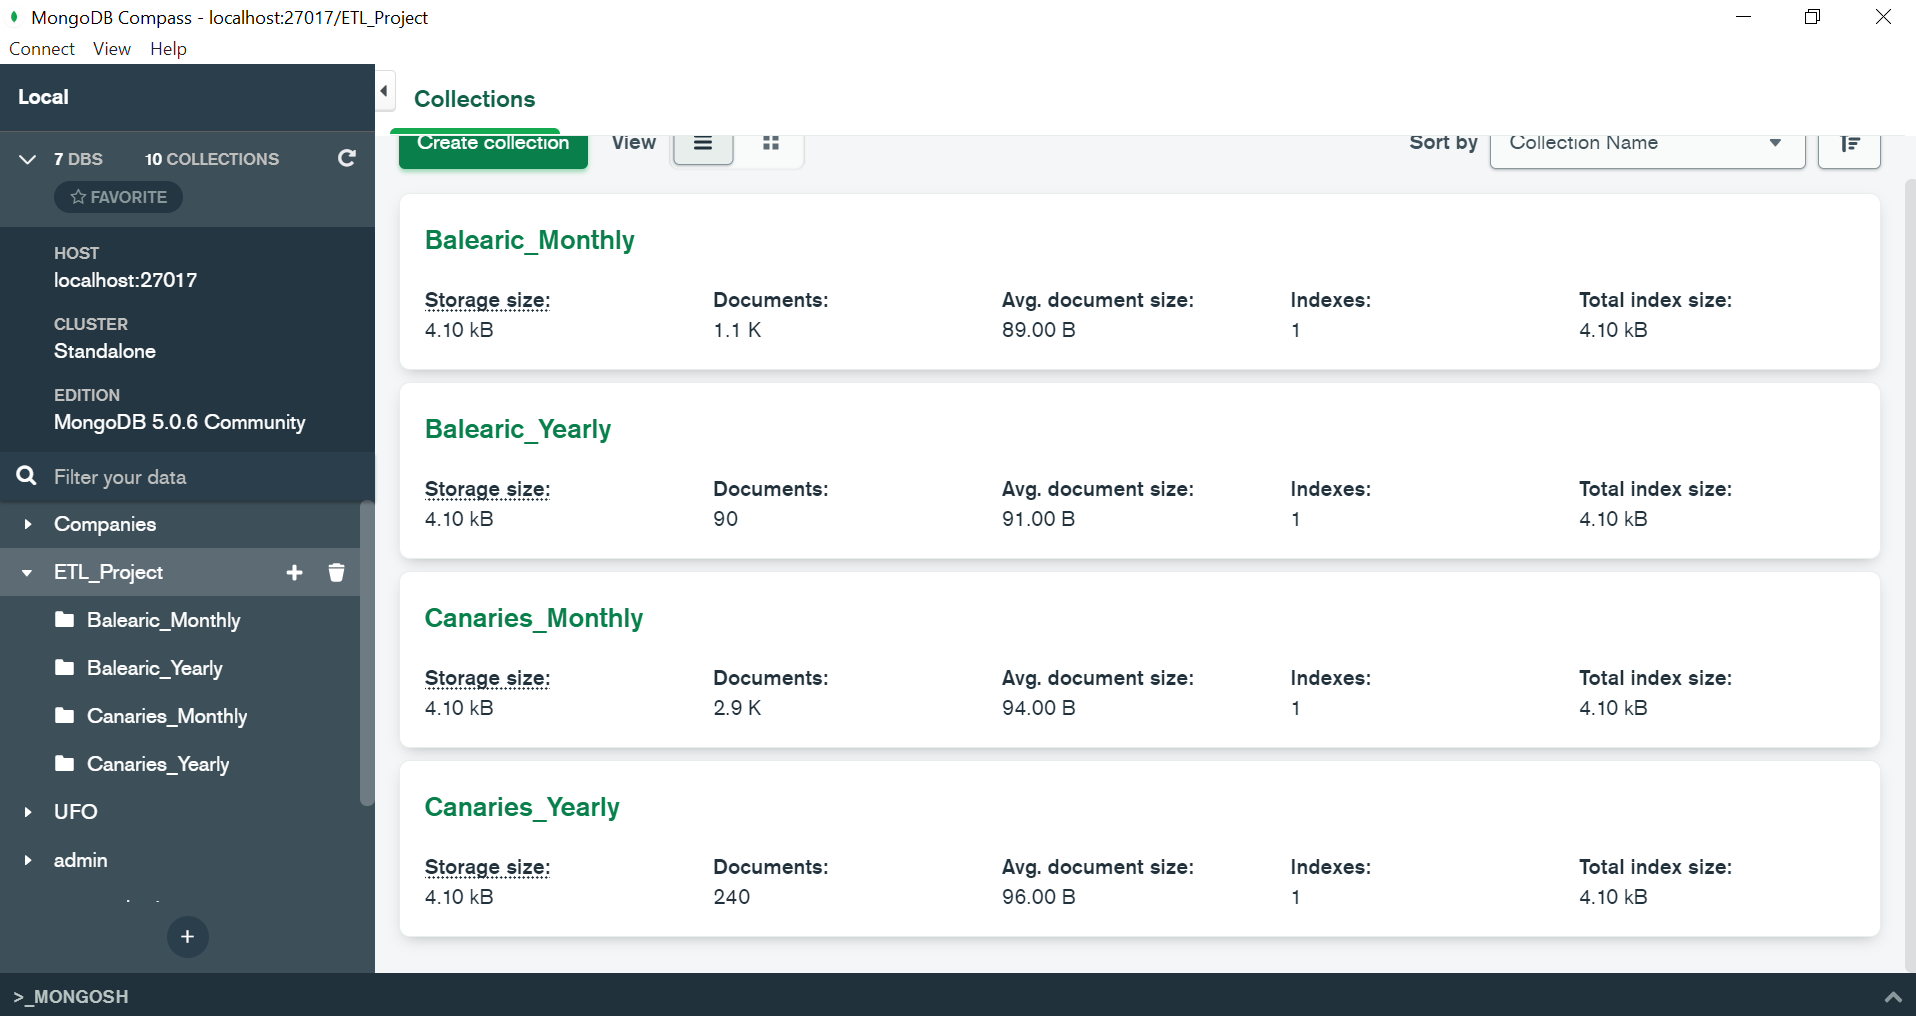